<p style="text-align: center">¡Bienvenido a MONAI!</p>
<p style="text-align: center">Este notebook te introducirá al diseño y arquitectura de MONAI Core. Tendrás ejemplos prácticos con transforms, cargadores de datasets, caché y redes.</p>


Este notebook tiene el comando pip para instalar MONAI y se añadirá a cualquier notebook subsiguiente.



### Verificar acceso a GPU

Ejecutar **!nvidia-smi** en una celda verificará que esto ha funcionado y mostrará qué tipo de hardware tienes disponible.

In [1]:
!python -c "import monai" || pip install -qU "monai[ignite, nibabel, torchvision, tqdm]==1.2.0"



Ejecuta la siguiente celda para instalar MONAI la primera vez que ejecutes un notebook:

In [2]:
!nvidia-smi

Wed Jul 16 17:03:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.57.04              Driver Version: 576.52         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060        On  |   00000000:01:00.0  On |                  N/A |
| 30%   37C    P5            N/A  /  115W |    1323MiB /   8188MiB |      6%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Comenzando con MONAI

MONAI es un framework open-source basado en PyTorch para deep learning en imágenes médicas, parte del ecosistema PyTorch.

*Sus objetivos son:*

- desarrollar una comunidad de investigadores académicos, industriales y clínicos colaborando sobre una base común
- crear flujos de trabajo de entrenamiento de última generación para imágenes médicas
- proporcionar a los investigadores una forma optimizada y estandarizada de crear y evaluar modelos de deep learning

### Flujo de trabajo de MONAI de principio a fin

MONAI busca apoyar el deep learning en análisis de imágenes médicas en múltiples niveles. Esta figura muestra un ejemplo típico de un flujo de trabajo de principio a fin en un contexto de deep learning médico:

<center><img src="../src/images/end_to_end.png" style="width: 1400px;"/></center>

### ¿Cuál es la necesidad?

* Las aplicaciones biomédicas tienen requerimientos específicos
* Las modalidades de imagen (MR, CT, US, etc.) requieren funcionalidades de procesamiento de datos específicas
* Los formatos de datos (DICOM, NIfTI, etc.) son propios de aplicaciones médicas y requieren soporte particular
* Ciertas arquitecturas de red están diseñadas o son especialmente adecuadas para aplicaciones biomédicas
* Los transforms de datos específicos para aplicaciones biomédicas y modalidades de imagen son muy útiles para el preprocesamiento, la augmentación durante el entrenamiento y el postprocesamiento
* La ciencia reproducible requiere experimentos reproducibles, lo que a su vez depende de software accesible para otros científicos, incluso si solo es como base común
* Una librería impulsada por la comunidad que provea soluciones a estos requerimientos reduce la duplicación/reimplementación
* Implementaciones base de redes comunes, y de redes específicas de ciertos artículos, proveen una base para comparar entre redes y resultados de otros

### ¿Cómo responde MONAI a esta necesidad?

MONAI provee un framework de funcionalidades e infraestructura de deep learning para cubrir estas necesidades de manera flexible y compatible con PyTorch:
* Soporte directo para cargar y manipular tipos de archivos biomédicos
* Transforms específicos para datos biomédicos para regularización y augmentación de imágenes médicas para entrenamiento, validación y despliegue
* Librería de definiciones de redes, métricas y funciones de pérdida de propósito general, implementando arquitecturas y características tanto establecidas como de vanguardia
* Conjunto de componentes listos para usar para entrenamiento e inferencia que aprovechan la infraestructura computacional eficientemente



#### Mejorando la ciencia de datos reproducible

MONAI contribuye a la ciencia de datos reproducible facilitando el entrenamiento y la distribución de experimentos:
* Un framework común subyacente ayuda en la comparación e interoperabilidad entre implementaciones de los usuarios
* Los usuarios pueden elegir componentes y redes existentes, luego contribuir nuevo código para que sus resultados estén disponibles para otros
* Implementaciones de referencia de redes de artículos proveen bases para estudios de replicación y comparaciones

### Arquitectura de MONAI
Por principio de diseño explícito, MONAI provee APIs flexibles y ligeras para usuarios con distintos niveles de experiencia:
* Todos los componentes principales son módulos independientes, fácilmente integrables en programas PyTorch existentes
* Aprovecha los flujos de trabajo de MONAI para configurar rápidamente un programa robusto de entrenamiento o evaluación para experimentos de investigación.
* Se proveen ejemplos y demostraciones ricos para mostrar las características clave.
* Los investigadores contribuyen implementaciones basadas en el estado del arte para los últimos desafíos de investigación, incluyendo:
  * Análisis de imágenes COVID-19
  * Mecanismos de caché de datasets
  * Modos de ejecución de modelo paralelo
  * y más...


### Arquitectura de MONAI

<br>
<center><img src="../src/images/arch_modules_v0.4.png" style="width: 1000px;"/></center>

## Filosofía de diseño de MONAI

Principios clave:
* MONAI se parece a PyTorch, usa/extiende los tipos de PyTorch y sigue su filosofía de diseño general
* MONAI es aditivo sobre PyTorch, proporcionando extensiones o envoltorios
* MONAI es optativo e incremental, no es necesario reescribir modelos completos para integrar código existente
* MONAI es colaborativo, proporcionando adaptadores y componentes poco acoplados para facilitar la integración con código de terceros
* ¡MONAI es amigable con el ecosistema PyTorch y parte del ecosistema oficial!

## Objetivos de aprendizaje

Para ayudarte a entender más sobre los transforms de MONAI, el caché de datasets y las arquitecturas de red, esta guía te ayudará a responder seis preguntas clave:

1. **¿Qué transforms están disponibles para ayudar a crear un pipeline de datos para entrenamiento?**
2. **¿Qué se requiere para escribir un transform personalizado?**
3. **¿Cómo creo un dataset básico de MONAI con transforms?**
4. **¿Qué es un Dataset de MONAI y cómo funciona el caché de datasets?**
5. **¿Qué datasets comunes provee MONAI?**
6. **¿Qué redes y componentes de red provee MONAI y cómo se usan estos componentes para crear una red?**

### Imports

Comencemos importando nuestras dependencias:
* Vamos a cargar todo lo que necesitaremos para el resto del notebook aquí
* Verás muchas sentencias de importación, pero nos aseguraremos de repasar cada una a lo largo del notebook.

### Imports

In [3]:
import tempfile
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Any, Mapping, Hashable
import time
import torch

import monai
from monai.config import print_config
from monai.utils import first
from monai.config import KeysCollection

from monai.data import (Dataset, ArrayDataset, create_test_image_3d, DataLoader, DataLoader, 
CacheDataset, PersistentDataset, SmartCacheDataset)

from monai.transforms import (Transform, MapTransform, Randomizable, EnsureChannelFirst, EnsureChannelFirstd,
Compose, LoadImage, LoadImaged, Lambda, Lambdad, RandSpatialCrop, RandSpatialCropd, RandGaussianNoise,
RandGaussianNoised, Orientation, Rotate, MapTransform)

from monai.apps import DecathlonDataset, TciaDataset
from monai.apps.tcia import TCIA_LABEL_DICT

### Verifica tu configuración

Antes de comenzar, puede ser útil verificar la configuración de tu entorno y asegurarte de que todas las dependencias necesarias están instaladas. MONAI provee una utilidad práctica para esto con `print_config()`

In [4]:
print_config()

MONAI version: 1.5.0
Numpy version: 2.3.1
Pytorch version: 2.6.0+cu124
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: d388d1c6fec8cb3a0eebee5b5a0b9776ca59ca83
MONAI __file__: /home/<username>/Workspace/Medical-Image-PGTD/.venv/lib/python3.11/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.11
ITK version: 5.4.4
Nibabel version: 5.3.2
scikit-image version: 0.25.2
scipy version: 1.16.0
Pillow version: 11.3.0
Tensorboard version: 2.19.0
gdown version: 5.2.0
TorchVision version: 0.21.0+cu124
tqdm version: 4.67.1
lmdb version: 1.7.2
psutil version: 7.0.0
pandas version: 2.3.1
einops version: 0.8.1
transformers version: 4.53.2
mlflow version: 3.1.1
pynrrd version: 1.1.3
clearml version: 2.0.2

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



### 1. ¿Qué transforms están disponibles para ayudar a crear un pipeline de datos para entrenamiento?


#### Entrada/salida, procesamiento y augmentación de datos de imágenes médicas

Las imágenes médicas requieren métodos altamente especializados para I/O, preprocesamiento y augmentación. Suelen estar en formatos especializados con rica metainformación y los volúmenes de datos suelen ser de alta dimensión. Esto requiere procedimientos de manipulación cuidadosamente diseñados. El enfoque de MONAI en imágenes médicas se habilita mediante potentes y flexibles transformaciones de imagen que facilitan pipelines de preprocesamiento reproducibles y optimizados.

<img src="../src/images/medical_transforms.png" />

#### Los transforms soportan datos en formato diccionario y array

Los paquetes de visión por computadora más usados (como torchvision) se enfocan en procesamiento de imágenes 2D. MONAI provee transforms más específicos para el dominio, tanto para 2D como 3D, y mantiene la característica flexible de "compose".

Como el preprocesamiento de imágenes médicas suele requerir parámetros adicionales, MONAI provee transforms para datos de entrada encapsulados en diccionarios de Python. Los usuarios pueden especificar las claves correspondientes a los campos de datos y parámetros del sistema para componer transformaciones complejas.

Hay una amplia variedad de transforms en seis categorías: Crop & Pad, Intensity, IO, Post-processing, Spatial y Utilities. Para más detalles, visita todos los transforms en MONAI.

#### Transforms específicos para medicina
MONAI busca proveer un conjunto completo de transformaciones específicas para imágenes médicas. Actualmente incluyen, por ejemplo:

* LoadImage: Carga archivos en formatos médicos desde la ruta proporcionada
* Spacing: Remuestrea la imagen de entrada al pixdim especificado
* Orientation: Cambia la orientación de la imagen a los axcodes especificados
* RandGaussianNoise: Perturba intensidades de la imagen añadiendo ruido estadístico
* NormalizeIntensity: Normalización de intensidad basada en media y desviación estándar
* Affine: Transforma la imagen según parámetros afines
* Rand2DElastic: Deformación elástica y afín aleatoria en 2D
* Rand3DElastic: Deformación elástica y afín aleatoria en 3D

#### Crear datos de juguete y directorio temporal para ejemplos

Crearemos un directorio temporal y lo llenaremos con algunos archivos de imagen en formato Nifti que contienen una variedad aleatoria de esferas. También crearemos un par de segmentación correspondiente que se usará más adelante en el notebook.

In [5]:
fn_keys = ("img", "seg")  # filename keys for image and seg files

root_dir = tempfile.mkdtemp()
filenames = []

for i in range(5):
    im, seg = create_test_image_3d(128, 128, 128, num_objs=16, rad_max=25)

    im_filename = f"{root_dir}/im{i}.nii.gz"
    seg_filename = f"{root_dir}/seg{i}.nii.gz"
    filenames.append({"img": im_filename, "seg": seg_filename})

    n = nib.Nifti1Image(im, np.eye(4))
    nib.save(n, im_filename)

    n = nib.Nifti1Image(seg, np.eye(4))
    nib.save(n, seg_filename)

#### Transforms de array

Los transforms en MONAI son objetos llamables que aceptan entradas desde los datos iniciales de un dataset o de transforms previos. Podemos crearlos y llamarlos directamente sin ninguna infraestructura, ya que los componentes de MONAI están diseñados para ser lo más desacoplados posible. Por ejemplo, podemos cargar uno de nuestros archivos Nifti directamente creando el transform y llamándolo.

In [6]:
trans = Compose([LoadImage(image_only=True), EnsureChannelFirst()])
img = trans(filenames[0]["img"])
print(type(img), img.shape, img.get_device())

<class 'monai.data.meta_tensor.MetaTensor'> torch.Size([1, 128, 128, 128]) -1


#### Transforms de diccionario

Hasta ahora hemos visto transforms que se aplican a arrays individuales de Numpy, pero para la mayoría de los esquemas de entrenamiento se necesita un pipeline con múltiples valores:
* Para esto, MONAI incluye transforms para operar sobre diccionarios de arrays, uno para cada transform de array equivalente
* Estos pueden aplicarse a valores nombrados en un diccionario de entrada dejando intactos los valores no nombrados
  * por ejemplo, añadiendo ruido a una imagen pero dejando la imagen de etiqueta asociada sin cambios.

#### Transforms de diccionario

Antes en el notebook importamos los transforms equivalentes de diccionario, que tienen una 'd' al final de su nombre:
* Usaremos esos transforms en este notebook
* El argumento keys en LoadNiftid se usa para indicar qué claves contienen rutas a archivos Nifti
  * Todos los demás valores en el diccionario de entrada se conservarán
  * Con esto, podemos ver las claves retornadas al llamar al transform:

In [7]:
trans = LoadImaged(keys=fn_keys)
data = trans(filenames[0])
print(list(data.keys()))

['img', 'seg']


### ¿Qué se requiere para escribir un transform personalizado?



#### Transform personalizado de array

Podemos definir nuestra propia operación de transform personalizada de varias maneras. 

Si se usa un callable simple como operador, `Lambda` puede envolverlo como un transform:
* En este ejemplo definimos un transform que suma la imagen en la primera dimensión (ancho) para producir una imagen 2D:

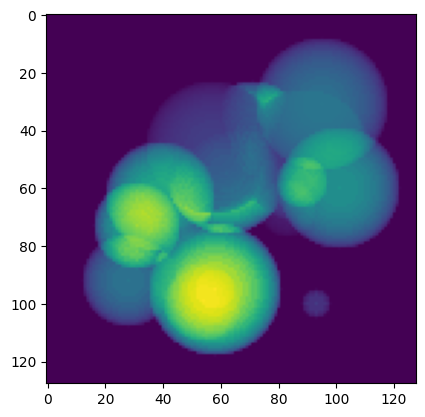

In [8]:
def sum_width(img):
    return img.sum(1)


trans = Compose([LoadImage(image_only=True), EnsureChannelFirst(), Lambda(sum_width)])
img = trans(filenames[0]["img"])
plt.imshow(img[0])

Crear una subclase de Transform es el segundo método, y tiene la ventaja de poder definir atributos con los objetos instanciados:
* Definamos una clase para sumar en una dimensión elegida, y usémosla para sumar en la segunda dimensión (alto):

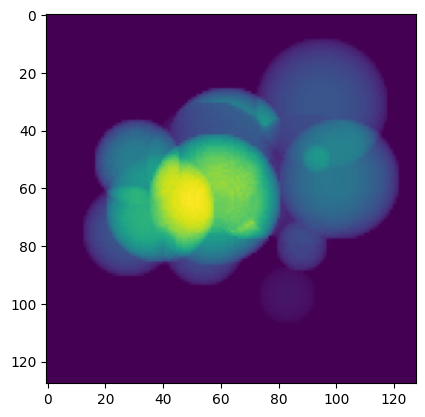

In [9]:
class SumDimension(Transform):
    def __init__(self, dim=1):
        self.dim = dim

    def __call__(self, inputs):
        return inputs.sum(self.dim)


trans = Compose([LoadImage(image_only=True), EnsureChannelFirst(), SumDimension(2)])
img = trans(filenames[0]["img"])
plt.imshow(img[0])

#### Transform personalizado de diccionario

`Lambdad` aplica el callable dado a cada array nombrado por `keys` por separado:
* Podemos usar esto para definir transforms que operan sobre diferentes valores nombrados en el diccionario en distintos puntos de la secuencia:

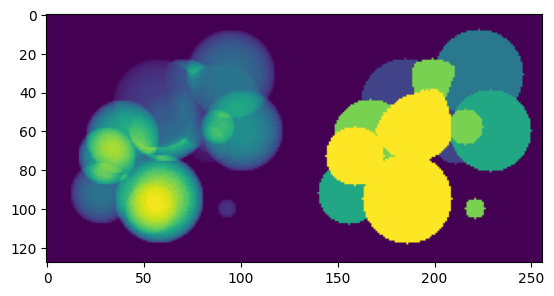

In [10]:
def sum_width(img):
    return img.sum(1)

def max_width(img):
    return img.max(1)

trans = Compose(
    [LoadImaged(fn_keys), EnsureChannelFirstd(fn_keys), Lambdad(("img",), sum_width), Lambdad(("seg",), max_width)]
)

imgd = trans(filenames[0])
img = imgd["img"]
seg = imgd["seg"]

plt.imshow(np.hstack((img[0] * 5 / img.max(), np.squeeze(seg[0]))))

#### Transforms deterministas vs no deterministas

*Transforms deterministas*: Dada la misma entrada, producen la misma salida

*Transforms no deterministas*: Dada la misma entrada, producen una salida aleatoria cada vez, basada en el generador de números aleatorios

Los transforms no deterministas de MONAI tienen varias características útiles:
* Por defecto, cada transform tiene su propio generador de números aleatorios
* Los datasets pueden sobrescribir esto (ver `ArrayDataset` abajo)
* Puedes sobrescribirlo proporcionando un 'seed' o una instancia de `RandomState`


### 3. ¿Cómo creo un dataset básico de MONAI con transforms?

Ahora que hemos visto los transforms, veamos los datasets:
* Con una fuente de datos y transforms definidos, ahora podemos crear un objeto dataset
* La clase base de MONAI es `Dataset`, creada aquí para cargar solo los archivos de imagen Nifti
* `Dataset` hereda de la clase de Pytorch con ese nombre y solo añade la capacidad de aplicar el transform dado a los ítems seleccionados
  * Si conoces la clase de Pytorch, funcionará igual. 

In [11]:
images = [fn["img"] for fn in filenames]

transform = Compose([LoadImage(image_only=True), EnsureChannelFirst()])
ds = Dataset(images, transform)
img_tensor = ds[0]
print(img_tensor.shape, img_tensor.get_device())

torch.Size([1, 128, 128, 128]) -1


#### ArrayDataset

MONAI provee `ArrayDataset` para aplicaciones de entrenamiento supervisado:
* Proporciona un pipeline para imágenes y otro para etiquetas
* Típicamente útil cuando se hacen augmentaciones en imágenes que no tienen sentido para las etiquetas
  * Añadir ruido, normalización, etc.
* Ambos pipelines usan el estado aleatorio del dataset para asegurar consistencia en operaciones aleatorias
  * Nota: Las operaciones compartidas deben estar en el mismo orden
  * Nota: Las operaciones compartidas deben estar antes de cualquier operación no compartida

#### ArrayDataset

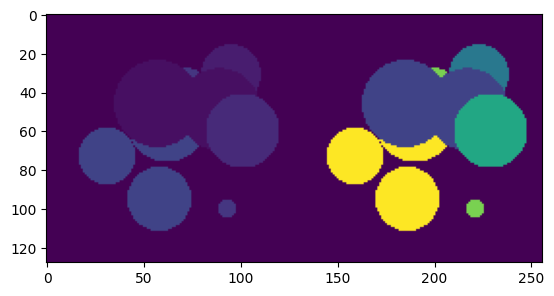

In [12]:
images = [fn["img"] for fn in filenames]
segs = [fn["seg"] for fn in filenames]

img_transform = Compose(
    [
        LoadImage(image_only=True),
        EnsureChannelFirst(),
        RandSpatialCrop((128, 128, 128), random_size=False),
        RandGaussianNoise(.5, 1, 1),
    ]
)
seg_transform = Compose(
    [LoadImage(image_only=True), EnsureChannelFirst(), RandSpatialCrop((128, 128, 128), random_size=False)]
)

ds = ArrayDataset(images, img_transform, segs, seg_transform)
im, seg = ds[0]
plt.imshow(np.hstack([im.numpy()[0, 48], seg.numpy()[0, 48]]))

#### Dataset con transforms basados en diccionario

Alternativamente, `Dataset` puede usarse con transforms basados en diccionario para construir un mapeo de resultados. Para aplicaciones de entrenamiento más allá de simples pares entrada/verdad-terreno como el anterior, esto sería más adecuado:

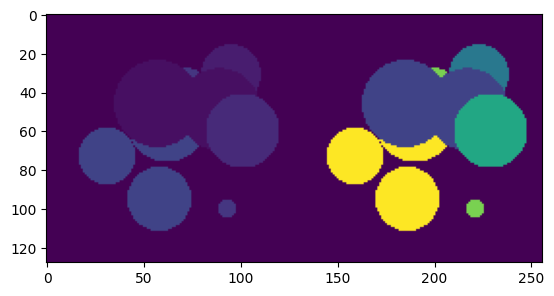

In [13]:
trans = Compose(
    [
        LoadImaged(fn_keys),
        EnsureChannelFirstd(fn_keys),
        RandGaussianNoised(("img",)),
        RandSpatialCropd(fn_keys, (128, 128, 128), random_size=False),
    ]
)

ds = Dataset(filenames, trans)
item = ds[0]
im, seg = item["img"], item["seg"]
plt.imshow(np.hstack([im.numpy()[0, 48], seg.numpy()[0, 48]]))

#### DataLoader

Con el dataset definido, ahora podemos crear el dataloader para crear lotes de datos:
* Hereda de la clase `DataLoader` de Pytorch con algunos cambios en los argumentos por defecto del constructor
* La funcionalidad de MONAI es compatible con el DataLoader de PyTorch
  * La funcionalidad adicional añade extensiones clave al `DataLoader` estándar


##### Ejemplo
* El ejemplo de `DataLoader` usa cinco procesos worker para cargar los datos reales
* MONAI también provee varias subclases de `Dataset` para mejorar aún más la eficiencia de este proceso

['img', 'seg'] torch.Size([5, 1, 128, 128, 128])


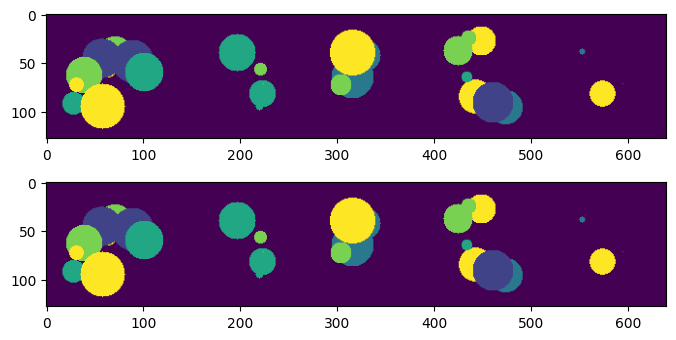

In [14]:
loader = DataLoader(ds, batch_size=5, num_workers=5)
batch = first(loader)
print(list(batch.keys()), batch["img"].shape)

f, ax = plt.subplots(2, 1, figsize=(8, 4))
ax[0].imshow(np.hstack(batch["img"][:, 0, 64]))
ax[1].imshow(np.hstack(batch["seg"][:, 0, 64]))

### 4. ¿Qué es un Dataset de MONAI y cómo funciona el caché de datasets?


A menudo los usuarios necesitan entrenar el modelo durante muchas (potencialmente miles de) épocas sobre los datos para lograr la calidad deseada del modelo:
* Una implementación nativa de PyTorch puede cargar datos y ejecutar los mismos pasos de preprocesamiento repetidamente en cada época durante el entrenamiento
* Puede ser lento y poco necesario, especialmente cuando los volúmenes de imágenes médicas son grandes
* Utilizando el caché de datasets, puedes reducir el tiempo que tu sistema tarda en cargar y preprocesar estos datos
* Reduciendo el tiempo total de entrenamiento.

Demostraremos dos de las subclases de Dataset aquí, pero hay otros `Dataset` especializados útiles



#### ¿Qué es un Dataset de MONAI?

Un Dataset de MONAI es un dataset genérico con una propiedad __len__, una propiedad __getitem__ y un transform callable opcional al obtener una muestra de datos.

Comenzaremos inicializando algunos datos genéricos, llamando a la clase Dataset con los datos genéricos y especificando None para los transforms.

In [15]:
items = [{"data": 4}, 
         {"data": 9}, 
         {"data": 3}, 
         {"data": 7}, 
         {"data": 1},
         {"data": 2},
         {"data": 5}]
dataset = monai.data.Dataset(items, transform=None)

print(f"Length of dataset is {len(dataset)}")
for item in dataset:
    print(item)

Length of dataset is 7
{'data': 4}
{'data': 9}
{'data': 3}
{'data': 7}
{'data': 1}
{'data': 2}
{'data': 5}


#### Compatibilidad de Dataset con DataLoader de PyTorch

Los datasets de MONAI pueden usarse con el DataLoader estándar de PyTorch:
* Como se mencionó, el `DataLoader` de MONAI tiene funcionalidad adicional útil

In [16]:
for item in torch.utils.data.DataLoader(dataset, batch_size=2):
    print(item)

{'data': tensor([4, 9])}
{'data': tensor([3, 7])}
{'data': tensor([1, 2])}
{'data': tensor([5])}


#### ¿Qué es el caché de datasets y cómo lo uso?

MONAI provee versiones multihilo de `CacheDataset` y `LMDBDataset` para acelerar los pipelines de transformación durante el entrenamiento:
 * pon los transforms deterministas primero, y los aleatorios después
 * la salida de los transforms deterministas siempre es la misma, ¡así que solo se calcula una vez!
 * los transforms aleatorios producen salidas diferentes cada vez, así que deben calcularse siempre
   * puede dar hasta 10x de aceleración en experimentos con Datasets.
 

 
<img src="../src/images/cache_dataset.png" style="width: 700px;"/>
 


Para demostrar el beneficio del caché de datasets, vamos a construir un dataset con un transform lento:
 * Para eso, llamaremos a la función sleep durante cada una de las funciones `__call__`.

In [17]:
class SlowSquare(MapTransform):
    def __init__(self, keys):
        MapTransform.__init__(self, keys)
        print(f"keys to square it: {self.keys}")

    def __call__(self, x):
        time.sleep(1.0)
        output = {key: x[key] ** 2 for key in self.keys}
        return output

square_dataset = Dataset(items, transform=SlowSquare(keys="data"))

keys to square it: ('data',)


Como era de esperarse, tomará unos 7 segundos recorrer todos los ítems.

In [18]:
%time for item in square_dataset: print(item)

{'data': 16}
{'data': 81}
{'data': 9}
{'data': 49}
{'data': 1}
{'data': 4}
{'data': 25}
CPU times: user 4.04 ms, sys: 2.41 ms, total: 6.45 ms
Wall time: 7.07 s


Cada vez que ejecutamos este bucle toma aproximadamente 7 segundos recorrer todos los ítems:
 * 12 minutos extra de carga por 100 épocas
 * Podemos mejorar este tiempo utilizando caché.

#### Cache Dataset

Al usar [CacheDataset](https://docs.monai.io/en/latest/data.html?highlight=dataset#cachedataset) el caché se realiza cuando el objeto se inicializa por primera vez, así que la inicialización es más lenta que un dataset regular:
* Al cachear los resultados de los transforms no aleatorios, acelera el pipeline de datos de entrenamiento
* Si los datos solicitados no están en el caché, todos los transforms se ejecutarán normalmente.

In [19]:
square_cached = CacheDataset(items, transform=SlowSquare(keys='data'))

keys to square it: ('data',)


Loading dataset: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


Sin embargo, obtener repetidamente los ítems de un CacheDataset inicializado es rápido.

In [20]:
%timeit list(square_cached)

3.29 μs ± 15.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Caché persistente

[PersistentDataset](https://docs.monai.io/en/latest/data.html?highlight=dataset#persistentdataset) permite almacenamiento persistente de valores precomputados para gestionar eficientemente datos en formato diccionario más grandes que la memoria:
* Nuevamente, los componentes de transform no aleatorios se calculan la primera vez que se usan
* Se almacenan en el cache_dir para recuperación rápida en usos posteriores

In [21]:
square_persist = monai.data.PersistentDataset(items, transform=SlowSquare(keys='data'), cache_dir="my_cache")

%time for item in square_persist: print(item)

keys to square it: ('data',)
{'data': 16}
{'data': 81}
{'data': 9}
{'data': 49}
{'data': 1}
{'data': 4}
{'data': 25}
CPU times: user 11.1 ms, sys: 0 ns, total: 11.1 ms
Wall time: 5.67 s


Durante la inicialización de PersistentDataset pasamos el parámetro "my_cache" para la ubicación donde almacenar los datos intermedios. Veremos ese directorio abajo.

In [22]:
!ls my_cache

57d3e1f66415b9a6a36a90dd89c708c3.pt  acdbabea1a1facbf07dbe5010a951af9.pt
5ec8e24ba3963d83f2f6c81744796545.pt  ca0b3885ae71075716d5bd863961a8bc.pt
6c81bd5aa312ecd4ba9a5e0340e06a55.pt  f263a1a8f1344ac65b574f0bf30813af.pt
71177f0b196d6c5f84f26579bf19caae.pt


Al consultar el dataset en las siguientes épocas, no llamará al transform lento sino que usará los datos cacheados.

In [23]:
%timeit list(square_persist)

199 μs ± 1.22 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Las nuevas instancias del dataset pueden aprovechar los datos cacheados:

In [24]:
square_persist_1 = monai.data.PersistentDataset(items, transform=SlowSquare(keys='data'), cache_dir="my_cache")
%timeit list(square_persist_1)

keys to square it: ('data',)
204 μs ± 4.67 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### 5. ¿Qué datasets comunes provee MONAI?

Para comenzar rápidamente con datos de entrenamiento populares en el dominio médico, MONAI provee varios datasets específicos:
* MedNISTDataset, DecathlonDataset, etc.
* Proveen descarga fácil desde nuestro almacenamiento AWS, extracción de archivos de datos y soportan la generación de ítems de entrenamiento/evaluación con transforms

##### Decathlon Dataset 

La función [DecathlonDataset](https://docs.monai.io/en/latest/data.html?highlight=dataset#decathlon-datalist) aprovecha las características descritas a lo largo de este notebook. Estos datasets son una extensión de CacheDataset cubierto arriba.

In [25]:
dataset = monai.apps.DecathlonDataset(root_dir="./", task="Task04_Hippocampus", section="training", download=True)

Task04_Hippocampus.tar: 27.1MB [00:09, 3.07MB/s]                            

2025-07-16 17:11:01,241 - INFO - Downloaded: Task04_Hippocampus.tar
2025-07-16 17:11:01,274 - INFO - Verified 'Task04_Hippocampus.tar', md5: 9d24dba78a72977dbd1d2e110310f31b.
2025-07-16 17:11:01,275 - INFO - Writing into directory: ..



Loading dataset: 100%|██████████| 208/208 [00:00<00:00, 377.57it/s]


In [26]:
print(dataset.get_properties("numTraining"))
print(dataset.get_properties("description"))
print(dataset[0]['image'].shape)
print(dataset[0]['label'].shape)

{'numTraining': 260}
{'description': 'Left and right hippocampus segmentation'}
torch.Size([34, 56, 31])
torch.Size([34, 56, 31])


##### TCIA Dataset

[The Cancer Imaging Archive (TCIA)](https://www.cancerimagingarchive.net/) es un servicio que desidentifica y aloja un gran archivo público de imágenes médicas de cáncer:
* TCIA es financiado por el [Cancer Imaging Program (CIP)](https://imaging.cancer.gov/), parte del [National Cancer Institute (NCI)](https://www.cancer.gov/), y es gestionado por el [Frederick National Laboratory for Cancer Research (FNLCR)](https://frederick.cancer.gov/).
* La función `TciaDataset` descargará y extraerá automáticamente los datasets de TCIA con segmentaciones DICOM acompañantes, y funcionará como datasets de PyTorch para generar datos de entrenamiento/validación/prueba.

##### TCIA Dataset

[Quin Prostate Dataset](https://www.cancerimagingarchive.net/collection/qin-prostate-repeatability/)

In [45]:
# Let's take the "QIN-PROSTATE-Repeatability" collection for example
collection, seg_type = "qin-prostate-repeatability", "SEG"

ds = TciaDataset(
    root_dir="./",
    collection=collection,
    section="training",
    download=True,
    download_len=1,
    seg_type=seg_type,
    progress=True,
    cache_rate=0.0,
    val_frac=0.2,
)

#print(ds.datalist[0])
#print(len(ds.datalist))

1.2.276.0.7230010.3.1.3.1426846371.19508.1513205205.886.zip: 16.0kB [00:00, 22.9kB/s]

2025-07-16 17:12:32,806 - INFO - Downloaded: qin-prostate-repeatability/1.2.276.0.7230010.3.1.3.1426846371.19508.1513205205.886.zip
2025-07-16 17:12:32,806 - INFO - Expected md5 is None, skip md5 check for file qin-prostate-repeatability/1.2.276.0.7230010.3.1.3.1426846371.19508.1513205205.886.zip.
2025-07-16 17:12:32,806 - INFO - Writing into directory: ./qin-prostate-repeatability/raw/1.2.276.0.7230010.3.1.3.1426846371.19508.1513205205.886.



1.3.6.1.4.1.14519.5.2.1.3671.4754.250530982889039458942609884846.zip: 1.65MB [00:01, 957kB/s] 

2025-07-16 17:12:36,696 - INFO - Downloaded: qin-prostate-repeatability/1.3.6.1.4.1.14519.5.2.1.3671.4754.250530982889039458942609884846.zip
2025-07-16 17:12:36,697 - INFO - Expected md5 is None, skip md5 check for file qin-prostate-repeatability/1.3.6.1.4.1.14519.5.2.1.3671.4754.250530982889039458942609884846.zip.
2025-07-16 17:12:36,697 - INFO - Writing into directory: ./qin-prostate-repeatability/PCAMPMRI-00015/1901/image.


### ¿Qué redes y componentes de red provee MONAI y cómo se usan estos componentes para crear una red?

MONAI provee definiciones para redes y sus componentes que heredan directamente de Pytorch Module, Sequential, etc. Estas redes de propósito general incluyen topologías parametrizables que pueden expandirse fácilmente y son independientes del resto de MONAI, por lo que pueden usarse con código de entrenamiento existente.

MONAI incluye los siguientes submódulos:
* layers: define capas de bajo nivel, fábricas para seleccionar capas de Pytorch y personalizadas según la dimensión y otros argumentos
* blocks: bloques de nivel medio que definen conceptos reutilizables específicos a partir de los cuales se construyen las redes
* nets: definiciones completas de redes para arquitecturas comunes, por ejemplo UNet, VNet, Densenet,


Los bloques y redes usan objetos LayerFactory como fábrica genérica para capas personalizadas y de PyTorch.

MONAI provee bloques para definir:
- Convolución con activación y regularización
- Unidades residuales
- Squeeze/excitation
- Downsampling/upsampling
- Convoluciones subpíxel

#### ¿Cómo se usan las capas de MONAI?

La funcionalidad de red representa una oportunidad de diseño significativa para MONAI:
* Pytorch es muy poco restrictivo en cómo se definen las redes
* Proporciona Module como clase base para crear una red y algunos métodos que deben implementarse
* Sin embargo, no hay un patrón prescrito ni mucha funcionalidad auxiliar para inicializar redes.

La falta de funcionalidad auxiliar deja mucho espacio para definir algunos patrones de "buenas prácticas" para construir nuevas redes en MONAI:
* Aunque las implementaciones triviales e inflexibles de redes son fáciles,
* Damos a los usuarios un conjunto de herramientas que facilita construir redes bien diseñadas y demostramos su valor comprometiéndonos a usarlas en las redes que construimos

In [46]:
from monai.networks.layers import Conv, Act, split_args, Pool

##### Convoluciones

La clase [Conv](https://docs.monai.io/en/latest/networks.html#convolution) tiene dos opciones para el primer argumento. El segundo argumento debe ser el número de dimensiones espaciales, `Conv[name, dimension]`, por ejemplo:

In [47]:
print(Conv[Conv.CONV, 1])
print(Conv[Conv.CONV, 2])
print(Conv[Conv.CONV, 3])
print(Conv[Conv.CONVTRANS, 1])
print(Conv[Conv.CONVTRANS, 2])
print(Conv[Conv.CONVTRANS, 3])

<class 'torch.nn.modules.conv.Conv1d'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.conv.Conv3d'>
<class 'torch.nn.modules.conv.ConvTranspose1d'>
<class 'torch.nn.modules.conv.ConvTranspose2d'>
<class 'torch.nn.modules.conv.ConvTranspose3d'>


Las clases configuradas son las capas "vanilla" de PyTorch. Podemos crear instancias de ellas especificando los argumentos de la capa:

In [48]:
print(Conv[Conv.CONV, 2](in_channels=1, out_channels=4, kernel_size=3))
print(Conv[Conv.CONV, 3](in_channels=1, out_channels=4, kernel_size=3))

Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
Conv3d(1, 4, kernel_size=(3, 3, 3), stride=(1, 1, 1))


##### Activación

Las clases [Act](https://docs.monai.io/en/latest/networks.html#module-monai.networks.layers.Act) no requieren la información de dimensión espacial, pero soportan argumentos adicionales.

In [49]:
print(Act[Act.PRELU])
Act[Act.PRELU](num_parameters=1, init=0.1)

<class 'torch.nn.modules.activation.PReLU'>


PReLU(num_parameters=1)

Estas pueden especificarse completamente con una tupla `(type_name, arg_dict)`, como `("prelu", {"num_parameters": 1, "init": 0.1})`:

In [50]:
act_name, act_args = split_args(("prelu", {"num_parameters": 1, "init": 0.1}))
Act[act_name](**act_args)

PReLU(num_parameters=1)

#### ¿Cómo se usan estos componentes para crear una red?

##### Redes de definición flexible

Estas APIs permiten definiciones flexibles de redes. Abajo crearemos una clase llamada `MyNetwork` que utiliza `Conv`, `Act` y `Pool`. Cada red requiere un `__init__` y una función `forward`.

In [51]:
class MyNetwork(torch.nn.Module):
    def __init__(self, dims=3, in_channels=1, out_channels=8, kernel_size=3, pool_kernel=2, act="relu"):
        super(MyNetwork, self).__init__()
        # convolution
        self.conv = Conv[Conv.CONV, dims](in_channels, out_channels, kernel_size=kernel_size)
        # activation
        act_type, act_args = split_args(act)
        self.act = Act[act_type](**act_args)
        # pooling
        self.pool = Pool[Pool.MAX, dims](pool_kernel)

    def forward(self, x: torch.Tensor):
        x = self.conv(x)
        x = self.act(x)
        x = self.pool(x)
        return x

##### Instanciaciones de ejemplo

Esta definición de red puede instanciarse para soportar entradas 2D o 3D, con tamaños de kernel flexibles. Es útil al adaptar el mismo diseño de arquitectura para diferentes tareas, cambiando fácilmente entre 2D, 2.5D y 3D.

In [52]:
# default network instance
default_net = MyNetwork()
print(default_net)
print(default_net(torch.ones(3, 1, 20, 20, 30)).shape)

# 2D network instance
elu_net = MyNetwork(dims=2, in_channels=3, act=("elu", {"inplace": True}))
print(elu_net)
print(elu_net(torch.ones(3, 3, 24, 24)).shape)

# 3D network instance with anisotropic kernels
sigmoid_net = MyNetwork(3, in_channels=4, kernel_size=(3, 3, 1), act="sigmoid")
print(sigmoid_net)
print(sigmoid_net(torch.ones(3, 4, 30, 30, 5)).shape)

MyNetwork(
  (conv): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (act): ReLU()
  (pool): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
torch.Size([3, 8, 9, 9, 14])
MyNetwork(
  (conv): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (act): ELU(alpha=1.0, inplace=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
torch.Size([3, 8, 11, 11])
MyNetwork(
  (conv): Conv3d(4, 8, kernel_size=(3, 3, 1), stride=(1, 1, 1))
  (act): Sigmoid()
  (pool): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
torch.Size([3, 8, 14, 14, 2])


### Redes MONAI

MONAI provee más de 20 redes incluyendo:
- UNet
- VNet
- AHNet
- VGG-like regressor, classifier, discriminator, critic
- HighResNet
- SENet
- UNETR

### Ejemplos de UNet

Definiremos una red UNet 2D con 2 capas ocultas que tienen salidas de 8, 16 y 32 canales, y una capa inferior (bottleneck) que produce salidas de 32 canales. Los valores de stride indican el stride para la convolución inicial, es decir, downsampling en el camino descendente y upsampling en el ascendente, y usará convoluciones transpuestas para implementar el upsampling.


In [53]:
net = monai.networks.nets.UNet(
    spatial_dims=2,  # 2 or 3 for a 2D or 3D network
    in_channels=1,  # number of input channels
    out_channels=1,  # number of output channels
    channels=[8, 16, 32],  # channel counts for layers
    strides=[2, 2]  # strides for mid layers
)

## Resumen

Hemos cubierto Transforms, Datasets, Caché y Redes en MONAI. Algunos puntos clave:

- Hay una larga lista de transforms médicos específicos disponibles en MONAI
- Hay versiones de transforms para arrays y diccionarios.
- Puedes crear una función lambda simple o una clase basada en transform para crear tu propio transform personalizado
- Puedes crear un dataset de MONAI y pasarle directamente una cadena de transforms compuesta
- Un Dataset de MONAI es un dataset genérico con una propiedad len, getitem y un transform callable opcional al obtener una muestra de datos.


## Resumen
- Puedes usar caché de datasets para almacenar transforms y acelerar el entrenamiento. Algunas opciones incluidas son CachingDataset, PersistentCaching y SmartCaching
- MONAI provee acceso a algunos datasets de imágenes médicas comúnmente usados, incluyendo DecathlonDataset
- Entender las capas, bloques y redes básicas de MONAI
- Usar capas de MONAI para implementar una red flexible e instanciar dos ejemplos de UNet con diferentes parámetros